In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [2]:
# all the constants are in CGS units
# physical constants
sigma = 5.67051e-5 # Stefan-Boltzmann constant erg cm-2 K-4 s-1
k = 1.380658e-16 # Boltzmann constant erg k-1
m_u = 1.6605402e-24 # Atomic mass unit g
G = 6.67259e-8 # Gravitational constant cm3 g-1 s-2
h = 6.6260755e-27 # Planck constant erg s
hbar = 1.05457266e-27
c = 2.99792458e10 # speed of light in a vacuum cm s-1
year = 3.14e7
pc = 3.086e18
a0 = 5.29177e-9 # cm
eV = 1.6021772e-12 # erg

e = 4.8032068e-10 # Electron charge esu
m_e = 9.1093897e-28 # Mass of electron g
# distance
au = 1.496e13

# earth
r_earth = 6.378e8 # cm
m_earth = 5.974e27 # g
m_j_r = 317.89

# sun
m_sun = 1.99e33
r_sun = 6.96e10 # cm
L_sun = 3.9e33 # Solar luminosity erg s-1

In [5]:
b_rsuma = (1.28*r_sun*(1+0.0942))/(0.1038*au)
round(b_rsuma, 6)

0.062775

In [6]:
b_cosi = np.cos(87.63/180*np.pi)
round(b_cosi, 6)

0.041353

In [7]:
b_f_c = np.sqrt(0.435)*np.cos(1.23)
round(b_f_c, 6)

0.220445

In [8]:
b_f_s = np.sqrt(0.435)*np.sin(1.23)
round(b_f_s, 6)

0.621614

# Exercise 1

In [167]:
T = 5780
f = (np.exp(-13.6*eV/(k*T)))/(3e-7/m_u) * (2*np.pi*k*T*m_e/(h**2))**(3/2)
print(f)

8.140576281268807e-09


In [16]:
m_u/(0.5*1e-10)**3

13284321.599999998

In [19]:
3e-7/m_u*(0.5*1e-10)**3

2.258301244378185e-14

In [12]:
P = 3e-7/m_u *k* T
P

149661.20061411342

In [70]:
T = 3500
f = (np.pi*k*m_u*T/(h**2))**(3/2)*np.exp(-4.48*e/(k*T))
print('{:.6e}'.format(f))

0.000000e+00


In [174]:
xs = np.linspace(3790, 3810, 20)
for x in xs:
    a = (np.pi*k*m_u*x/(h**2))**(3/2)*np.exp(-4.48*eV/(k*x))-99*0.99*3e-7/m_u
    print(x, a)

3790.0 -6.010599372241203e+17
3791.0526315789475 -5.2863015094744474e+17
3792.1052631578946 -4.559321532617892e+17
3793.157894736842 -3.829651024323768e+17
3794.2105263157896 -3.0972815460135526e+17
3795.2631578947367 -2.362204637832704e+17
3796.315789473684 -1.6244118186165248e+17
3797.3684210526317 -8.838945858499584e+16
3798.4210526315787 -1.4064441562810368e+16
3799.4736842105262 6.053472373815501e+16
3800.5263157894738 1.3540889399777894e+17
3801.5789473684213 2.1055892804656947e+17
3802.6315789473683 2.8598568686942208e+17
3803.684210526316 3.616900336095355e+17
3804.7368421052633 4.376728335723827e+17
3805.7894736842104 5.139349542295429e+17
3806.842105263158 5.904772652225167e+17
3807.8947368421054 6.673006383669228e+17
3808.9473684210525 7.444059476560589e+17
3810.0 8.217940692649349e+17


In [21]:
from sympy import *

In [176]:
x = symbols('x')
solve((np.pi*k*m_u*x/(h**2))**(3/2)*exp(-4.48*eV/(k*x))-99*0.99*3e-7/m_u, x)

KeyboardInterrupt: 

In [27]:
from scipy.optimize import fsolve
a = fsolve(lambda x: (np.pi*k*m_u*x/(h**2))**(3/2)*np.exp(-4.48*e/(k*x))-99*99, 0)
a

C:\Users\huqr\AppData\Local\Temp\ipykernel_21168\1673183042.py:2: RuntimeWarning: divide by zero encountered in divide
  a = fsolve(lambda x: (np.pi*k*m_u*x/(h**2))**(3/2)*np.exp(-4.48*e/(k*x))-99*99, 0)


array([0.])

# Exercise2

In [97]:
B = 7/384 * hbar**2/(m_u*a0**2) * 1e-7 /1.6e-19 *1e4
B

2.7248872405298883

In [100]:
eV = 1.6021772e-12 # erg
B = 7/384 * hbar**2/(m_u*a0**2) /eV *1e4
B

2.72118438887273

In [115]:
B = 7/384 * hbar**2/(m_u*a0**2) / k
B

3.1577838862685916

In [101]:
J = np.arange(1, 11, 1)
J

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [107]:
B = 7/384 * hbar**2/(m_u*a0**2)
Eu = B*J*(J+1)
Eu

array([8.71963917e-16, 2.61589175e-15, 5.23178350e-15, 8.71963917e-15,
       1.30794588e-14, 1.83112423e-14, 2.44149897e-14, 3.13907010e-14,
       3.92383763e-14, 4.79580154e-14])

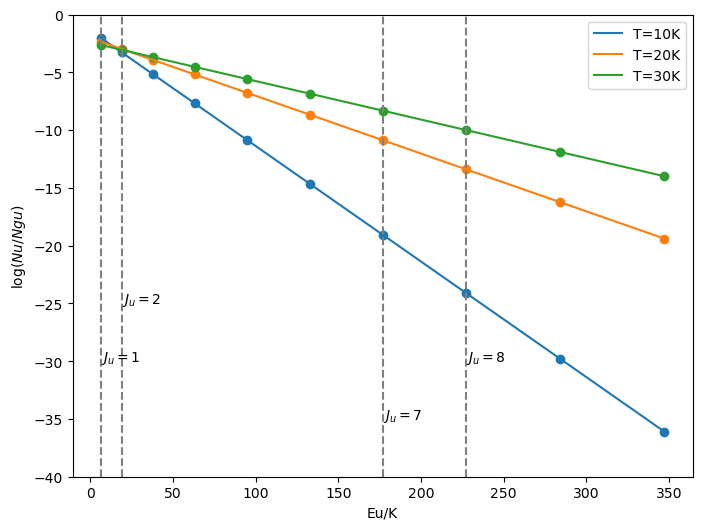

In [153]:
Ts = [10, 20, 30]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for T in Ts:
    Z = 0.36*(T + 0.88)
    y = -Eu/(k*T) - np.log(Z)
    ax.scatter(Eu/(k), y, marker='o')
    ax.plot(Eu/(k), y, label='T={:.0f}K'.format(T), linestyle='-')
ax.vlines(Eu[0]/(k), -40, 0, linestyle='--', color='gray')
ax.vlines(Eu[1]/(k), -40, 0, linestyle='--', color='gray')
ax.text(Eu[0]/(k), -30, r'$J_u=1$')
ax.text(Eu[1]/(k), -25, r'$J_u=2$')
ax.vlines(Eu[6]/(k), -40, 0, linestyle='--', color='gray')
ax.vlines(Eu[7]/(k), -40, 0, linestyle='--', color='gray')
ax.text(Eu[6]/(k), -35, r'$J_u=7$')
ax.text(Eu[7]/(k), -30, r'$J_u=8$')
ax.legend()
ax.set_ylim(-40, 0)
ax.set_xlabel('Eu/K')
ax.set_ylabel(r'$\log (Nu/Ngu)$')
plt.savefig('rotation.png', dpi=200)
plt.show()

# Exercise3

In [155]:
5780*(1-0.25)**(1/4)*(r_sun/(2*1.52*au))**(1/2)

210.4239581153292

In [160]:
H = (k*210.42*(3.397e8)**2)/(44*m_u*G*0.11*m_earth)
H

1046429.1029904078

In [159]:
rho = (6363*44*m_u)/(k*210.42)

In [162]:
4*np.pi*(3.397e8)**2*H*rho

2.42829603676294e+19

In [163]:
5780*(1-0.77)**(1/4)*(r_sun/(2*0.72*au))**(1/2)

227.51884503150876

In [166]:
r_sun/2 * (110.1*0.23)**0.5 * (5780/246.1)**2 / au

6.4571024539110855